# Algorithmique avancée : triangulation de polygones convexes
##### Encadrant
- MMe Wafa HUSSEINI
##### Enseignant
- Mr Olivier PIVERT
##### Auteurs
- Yasser JARMOUNI
- Haydar SELMI

In [1]:
from polygenerator import random_convex_polygon
from math import (ceil)
import matplotlib.pyplot as plt

##### Fonctions utilitaires

In [2]:
def plot_polygon(polygon : list, triangulation : list) -> None:
    """
    Permet de dessiner le polygone à partir et sa triangulation
    
    polygon       -- liste de couples coordonnés (x, y) formant un polygone convexe
    triangulation -- liste de couples d'indices (sommet1, sommet2 )
                     représentant les cordes de la triangulation
    
    return        -- None
    """
    polygon.append(polygon[0])
    xs, ys = zip(*polygon) 
    plt.figure()
    plt.plot(xs,ys)
    # Dessin des cordes
    i = 0
    for coord in triangulation:
        plt.plot(
            [polygon[coord[0]][0], polygon[coord[1]][0]], 
            [polygon[coord[0]][1], polygon[coord[1]][1]], color="red")
        i += 1
    plt.show()

In [3]:
def distance(point1 : list, point2 : list) -> float:
    """
    Permet de calculer la distance entre 2 points.
    
    point1 -- coordonnés x, y sous forme de couple liste.
    point2 -- coordonnés x, y sous forme de couple liste.
    
    return -- la distance en float
    """
    x1, y1 = point1
    x2, y2 = point2
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [4]:
def distance_3_sommets(sommet1 : list, sommet2 : list, sommet3 : list, i, k, j) -> float:
    """
    Calcule la distance des cordes (sommet1, sommet2) et (sommet2, sommet3)
    
    sommet1 -- Couple coordonnés (x, y) donnant le sommet 
    sommet2 -- Couple coordonnés (x, y) donnant le sommet 
    sommet3 -- Couple coordonnés (x, y) donnant le sommet 
    i       -- indice du sommet1 dans le polygone convexe
    k       -- indice du sommet2 dans le polygone convexe
    j       -- indice du sommet3 dans le polygone convexe
    
    return  -- La distance en float
    """
    dist = 0
    if(abs(k - i) > 1):
        dist += distance(sommet1, sommet2)
    if(abs(j - k) > 1):
        dist += distance(sommet2, sommet3)
    
    return dist

## Essais successifs

### 1. validecorde et intersecte

In [5]:
def intersecte(corde1 : tuple, corde2 : tuple) -> bool:
  """
  Vérifie si la corde1 est en intersection avec la corde2
  
  corde1 -- tuple de 2 entiers ou les entiers représentent l'orde d'un sommet
    dans le polygone convexe
  corde2 -- tuple de 2 entiers ou les entiers représentent l'orde d'un sommet
    dans le polygone convexe
  
  return -- bool : True s'ils sont en intersection False sinon
  """
  i, j = corde1
  p, q = corde2
  if i == p and q == j:
      return True
  elif (corde2[0] < corde1[0] < corde2[1]) ^ (corde2[0] < corde1[1] < corde2[1]):
    return True
  return False

print(intersecte((1, 4), (1, 4)))

True


In [6]:
def validecorde(i : int, j : int, cordes_traces : list) -> bool:
  """
  Vérifie si la corde (i, j) n'intersecte aucune des cordes dans la liste 
  corde_traces
  
  i            -- indice du premier sommet de la corde
  j            -- indice du deuxieme sommet de la corde
  corde_traces -- tableau de tuples représentant des couples de cordes
  
  return       -- bool
  """
  testCorde = (i, j)
  for cordeActuelle in cordes_traces:
    if intersecte(testCorde, cordeActuelle):
      return False
  
  return True

print(validecorde(1, 3, [(2, 4)]))
print(validecorde(1, 3, [(4, 5)]))

False
True


### 3.a Algorithme essais successifs simple

In [7]:
def generer_cordes(n : int) -> list:
    """
    Donne les combinaisons de toutes les cordes possibles
    pour n sommets.
    
    n      -- Le nombres de sommets
    
    return -- Liste de toutes les cordes possibles pour le polygone de taille n
    """
    C = []
    for i in range(n):
        for j in range(i + 2, n):
            if i != 0 or j != n - 1:
                C.append((i, j))
    return C

# Exemple
n = 20
C = generer_cordes(n)
print("Liste de toutes les combinaisons de cordes possibles : \n", C)

Liste de toutes les combinaisons de cordes possibles : 
 [(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13

In [8]:
def essais_successifs(n : int, cordes_tracées : list, C : list, triangulations : list) -> None:
    """
    Permet par essais successifs de donner une liste des triangulation completes possibles
    pour un polygone convexe de n sommets.
    
    n              -- taille du polygone convexe
    cordes_tracées -- La liste contenant des tuples cordes deja tracees
    C              -- Liste de toutes les cordes possibles pour le polygone
    triangulations -- Liste des triangulations completes trouves pour le polygone
    
    return         -- None
    """
    if len(cordes_tracées) == n - 3:  # Si la triangulation est complète
        triangulations.append(cordes_tracées.copy())
        return 
    for corde in C:
        if validecorde(corde[0], corde[1], cordes_tracées):
            cordes_tracées.append((corde[0], corde[1]))
            essais_successifs(n, cordes_tracées, C, triangulations)
            cordes_tracées.pop()  # Retirer la dernière corde pour revenir en arrière

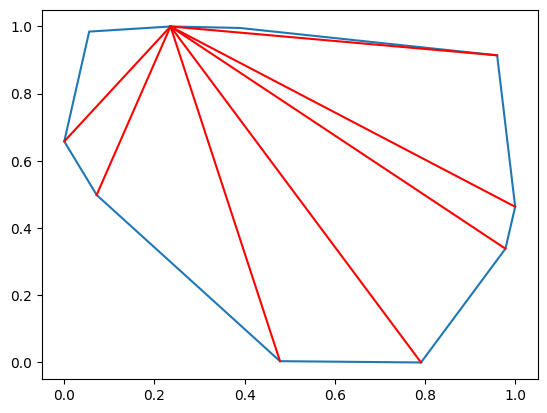

In [9]:
# Test de la strategie d'essais successifs et affichage
nbSommets = 10
triangulations = []
essais_successifs(nbSommets, [], generer_cordes(nbSommets), triangulations)
polygone_convexe = random_convex_polygon(nbSommets)
plot_polygon(polygone_convexe, triangulations[0])

### 3.a Algorithme essais successifs avec condition d'elagage

In [10]:
Lmin = float('inf')

In [11]:
def essais_successifs_elagage(nbSommets : int, polygone : list, cordes_tracées : list, C : list, triangulations: list, Lcurrent : float) -> None:
    """
    Permet de donner les triangulations completes dans le tableau triangulations
    pour un polygone convexe de nbSommets sommets
    
    nbSommets      -- Le nombre de sommets du polygone
    polygone       -- Liste de couples coordonnees des sommets formant un polygone
    cordes_tracées -- Liste des cordes deja tracees
    C              -- Liste de toutes les cordes possibles pour le polygone
    triangulations -- Liste de liste de tuples de cordes donnant les triangulations
    Lcurrent       -- La longueur distance actuelle pour la triangulation actuelle
    
    return         -- None
    """
    global Lmin  # Ajoutez cette ligne pour utiliser la variable globale Lmin
    if len(cordes_tracées) == nbSommets - 3:
        if Lcurrent < Lmin:
            Lmin = Lcurrent
            triangulations.clear()
            triangulations.append(cordes_tracées.copy())
        elif Lcurrent == Lmin:
            triangulations.append(cordes_tracées.copy())
        return 

    for corde in C:
        if validecorde(corde[0], corde[1], cordes_tracées):
            Lcurrent = Lcurrent + distance(polygone[corde[0]], polygone[corde[1]])
            if Lcurrent <= Lmin:
                cordes_tracées.append((corde[0], corde[1]))
                essais_successifs_elagage(nbSommets, polygone, cordes_tracées, C, triangulations, Lcurrent)
                cordes_tracées.pop()
            Lcurrent = Lcurrent - distance(polygone[corde[0]], polygone[corde[1]])

[(4, 6), (4, 7), (2, 4), (2, 7), (7, 9), (2, 9), (1, 9)]


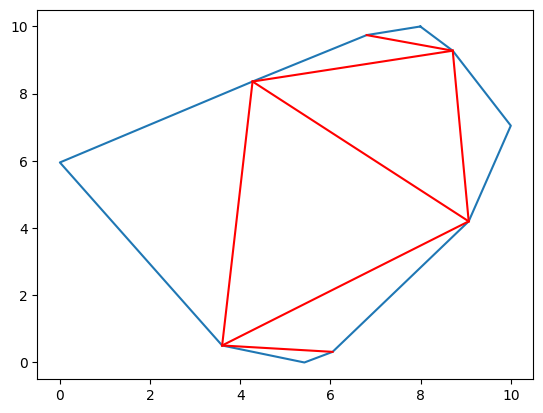

In [12]:
# Test de la strategie d'essais successifs avec condition d'elagage et affichage
Lmin = float('inf')
nbSommets = 10
polygone_convexe = random_convex_polygon(nbSommets)
polygone = [((x[0] * 10),(x[1] * 10)) for x in polygone_convexe] 
C = generer_cordes(nbSommets)  # Cordes possibles pour ce polygone
triangulations = []
essais_successifs_elagage(nbSommets, polygone, [], C, triangulations,0)
print(triangulations[0])  # Affiche la liste des triangulations minimales
plot_polygon(polygone, triangulations[0])

## Programmation dynamique

In [13]:
def triangulation_minimale_dynamique(polygone : list) -> list:
    """
    Permet de donner le tableau des couts et tableau des sous problemes 
    pour la resolution dynamique de la triangulation du polygone 
    
    polygone       -- Liste de couples coordonnees des sommets formant un polygone
    
    return         -- Matrice des couts sous problemes T et Matrice des couts C
    """
    # Nombre de sommets du polygone
    n = len(polygone)
    # Matrice n*n pour stocker les sous-problemes de triangulation_minimale_dynamique
    T = [[None] * n for i in range(n)]
    # Matrice n*n pour stocker les couts de chaque triangulation_minimale_dynamique
    C = [[0] * n for i in range(n)]
    # On traite le probleme de triangulation pour toutes les tailles de polygones
    # dans l'ordre croissant on doit avoir alors n - 2 problemes a traiter
    for taille in range(2, n):
        # On essaye tout les sommets de departs possibles
        for i in range(0, n - taille):
            # On initialise le sommet de fin terminant le polygone actuel
            j = i + taille
            # On initialise le cout pour le probleme actuel Ti,j
            C[i][j] = float("Inf")
            # Pour tout les sommets intermediaires
            for k in range(i + 1, j):
                cout =  C[i][k] + C[k][j] + distance_3_sommets(polygone[i], polygone[k], polygone[j], i, k, j)
                if cout < C[i][j]:
                    C[i][j] = cout
                    T[i][j] = (i, k, j)
    return T, C

In [14]:
def reconstruire_triangulation_minimale_dynamique(T : list, i : int, j : int, result : list, n : int) -> list:
    """
    Permet de reconstruire la triangulation minimale dynamique
    
    T        -- Matrice des sous problemes Ti,j
    i        -- L'indice i actuel
    j        -- L'indice j actuel
    result   -- La liste de cordes pour la triangulation minimale
    n        -- nombre de sommets du polygone
    
    return   -- None
    """
    if T[i][j] is None:
        return
    k = T[i][j][1]
    if (i, k) not in result and abs(i - k) != 1 and not (i == 0 and k == n - 1):
        result.append((i, k))
    if (k, j) not in result and abs(k - j) != 1 and not (k == 0 and j == n - 1):
        result.append((k, j))
    reconstruire_triangulation_minimale_dynamique(T, i, k, result, n)
    reconstruire_triangulation_minimale_dynamique(T, k, j, result, n)

27


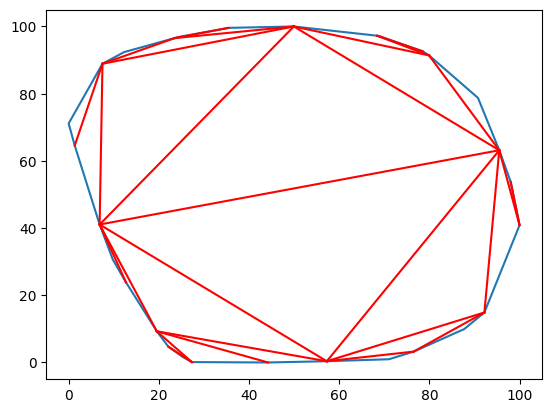

In [15]:
# Test de la triangulation par algorithme dynamique et affichage
nbSommets = 30
polygone_convexe = random_convex_polygon(nbSommets)
polygone = [((x[0]*100),(x[1]*100)) for x in polygone_convexe]
T, C = triangulation_minimale_dynamique(polygone)
triangulation = []
reconstruire_triangulation_minimale_dynamique(T, 0, nbSommets-1, triangulation, nbSommets)
print(len(triangulation))
plot_polygon(polygone, triangulation)

## Algorithme glouton

In [16]:
def glouton_tour_des_sommets(sommets : int) -> list:
    """
    Permet de construire la triangulation glouton a partir du nombre de sommets
    du polygone
    
    n        -- nombre de sommets du polygone
    
    return   -- La liste de cordes pour la triangulation minimale 
    """
    n = len(sommets)

    # Générer les côtés du polygone
    cordes_tracees = [(i, i + 1) for i in range(n - 1)] + [(n - 1, 0)]

    # Créer une liste vide pour les cordes internes
    cordes_internes = []

    # Commencer par le sommet 0
    sommet_courant = 0

    while len(cordes_internes) < n - 3:
        # Faire le tour des sommets pour trouver une corde valide
        for j in range(1, n):
            sommet_suivant = (sommet_courant + j) % n

            # Vérifier si la corde (sommet_courant, sommet_suivant) est valide (n'intersecte pas les cordes déjà tracées)
            if validecorde(sommet_courant, sommet_suivant, cordes_tracees):
                # Ajouter la corde valide aux cordes internes et aux cordes tracées
                cordes_internes.append((sommet_courant, sommet_suivant))
                cordes_tracees.append((sommet_courant, sommet_suivant))

                # Continuer avec le sommet suivant
                sommet_courant = sommet_suivant
                break

    return cordes_internes

Nombre de cordes :  7


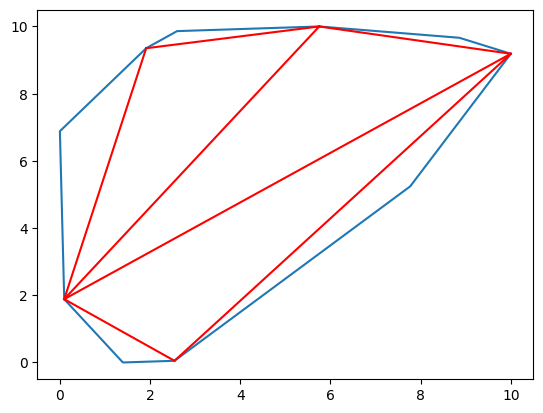

In [17]:
# Exemple d'utilisation
nbsommet = 10
C=random_convex_polygon(nbsommet)
polygone=[((x[0]*10),(x[1]*10)) for x in C] # Un polygone convexe (carré)
triangulation = glouton_tour_des_sommets(polygone)
print("Nombre de cordes : ", len(triangulation))

plot_polygon(polygone, triangulation)